<a href="https://colab.research.google.com/github/Jenil020/python/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load it using the correct filename
df = pd.read_csv('test.csv')


Saving test.csv to test (1).csv


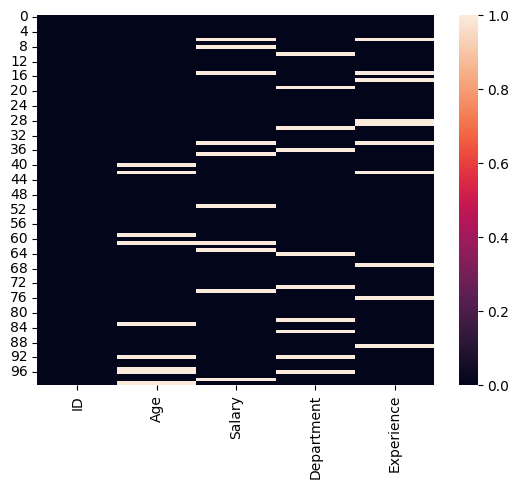

In [ ]:
df.isnull().sum() # count all null values
(df.isnull().sum().sum()/df.shape[0]*df.shape[1])*100 # how many percent null values contain in each coloumn
sns.heatmap(df.isnull()) # null values plot
plt.show()

,ID,Age,Salary,Department,Experience
0,1,32.5,500000.00,Tech,6.0
1,2,99.0,46634.84,Tech,6.7
2,3,33.2,47258.28,HR,40.0
3,4,37.6,43581.78,Admin,4.3
4,5,28.8,48709.71,HR,4.1


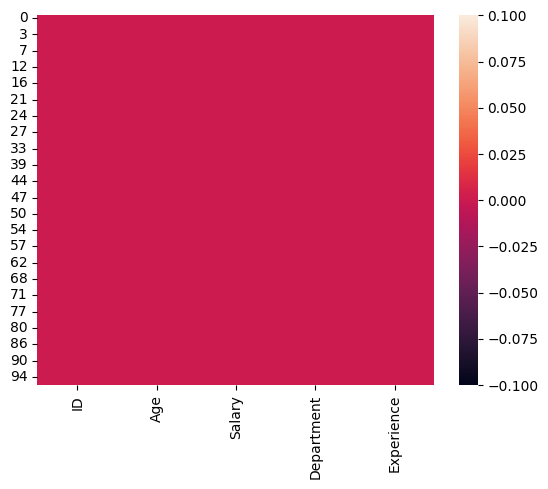

In [ ]:
df.dropna(inplace=True) #remove all rows which take null values
display(df.head(5))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(df['Age'].mode()[0]) #fill only age coloumns missing values
df.isnull().sum()

,0
ID,0
Age,0
Salary,0
Department,0
Experience,0


In [ ]:
#fill missing value
df.fillna(method="ffill") #forward filling missing value row wise
df.fillna(method="bfill") #backward filling missing value row wise
df.fillna(method="ffill",axis=1) #forward filling missing value column wise
df.fillna(method="bfill",axis=1) #backward filling missing value column wise

/tmp/ipython-input-25-3559784914.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill") #forward filling missing value row wise


,ID,Age,Salary,Department,Experience
0,1,32.5,500000.00,Tech,6.0
1,2,99.0,46634.84,Tech,6.7
2,3,33.2,47258.28,HR,40.0
3,4,37.6,43581.78,Admin,4.3
4,5,28.8,48709.71,HR,4.1
...,...,...,...,...,...
90,91,30.5,46427.88,Finance,5.2
91,92,34.8,56851.19,Finance,3.6
93,94,28.4,40034.09,Tech,4.7
94,95,28.0,51385.45,Finance,3.3


In [ ]:
df.info()
df.select_dtypes(include="object").columns #object type data contains


<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0 to 97
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          68 non-null     int64  
 1   Age         68 non-null     float64
 2   Salary      68 non-null     float64
 3   Department  68 non-null     object 
 4   Experience  68 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.2+ KB


Index(['Department'], dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

# Create the imputer to fill missing categorical values with the most frequent value
si = SimpleImputer(strategy="most_frequent")

# Get all categorical columns (object dtype)
categorical_columns = df.select_dtypes(include="object").columns

# Fit and transform those columns
df[categorical_columns] = si.fit_transform(df[categorical_columns])

display(df[categorical_columns])


,Department
0,Tech
1,Tech
2,HR
3,Admin
4,HR
...,...
90,Finance
91,Finance
93,Tech
94,Finance


In [ ]:
#Encoding (convert categorical data into numerical)
#(one hot encode using get dummies)
en_data = df[["Department"]]
pd.get_dummies(en_data)


,Department_Admin,Department_Finance,Department_HR,Department_Tech
0,False,False,False,True
1,False,False,False,True
2,False,False,True,False
3,True,False,False,False
4,False,False,True,False
...,...,...,...,...
95,False,False,False,True
96,False,False,False,False
97,False,False,False,True
98,False,False,True,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder
#one hot encoding using oneHotEncoder class of scikitlearn
ohe = OneHotEncoder()
ar =ohe.fit_transform(en_data).toarray()  #convert sparce matrix to an array
pd.DataFrame(ar , columns=["Department_Admin","Department_Finance","Department_HR","Department_Tech","Department_Management"])

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0.

,Department_Admin,Department_Finance,Department_HR,Department_Tech,Department_Management
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
95,0.0,0.0,0.0,1.0,0.0
96,0.0,0.0,0.0,0.0,1.0
97,0.0,0.0,0.0,1.0,0.0
98,0.0,0.0,1.0,0.0,0.0


In [ ]:
#Label Encoding (for nominal data)
df = pd.DataFrame({"name" : ["cow","dog","parrot","donkey"]})
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["en_name"]= le.fit_transform(df["name"])
df

,name,en_name
0,cow,0
1,dog,1
2,parrot,3
3,donkey,2


In [ ]:
#Encoding for ordinal data
df =pd.DataFrame({"Size" : ["s","l","xl","m","xxl"]})
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[["s","m","l","xl","xxl"]])
df["en_size"] = oe.fit_transform(df[["Size"]])
df

,Size,en_size
0,s,0.0
1,l,2.0
2,xl,3.0
3,m,1.0
4,xxl,4.0


<Axes: xlabel='Salary'>

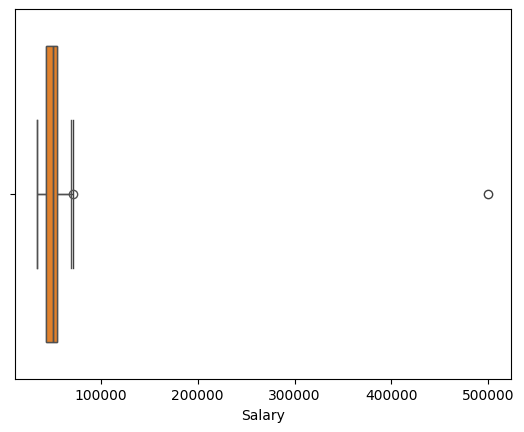

In [ ]:
#Remove Outliers from dataset
df = pd.read_csv('test.csv')
df.describe()
sns.boxplot(x="Salary", data=df)

# Q1 is 25% of data , Q3 is 75% of data
#IQR= Q3-Q1 (Inter qurtile range)
#min = Q3 - 1.5 * IQR , Max = Q3 + 1.5 * IQR (out of min and max data is Outliers)
q1 = df["Salary"].quantile(0.25)
q3 = df["Salary"].quantile(0.75)
iqr = q3-q1
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
new_dataset = df[df['Salary']<=max]
sns.boxplot(x="Salary", data=new_dataset)


/tmp/ipython-input-27-171276360.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])
/tmp/ipython-input-27-171276360.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset["Salary"])
/tmp/ipython-input-27-171276360.py:11: UserWarning: Boolean Series key will be reindexed to

<Axes: xlabel='Salary', ylabel='Density'>

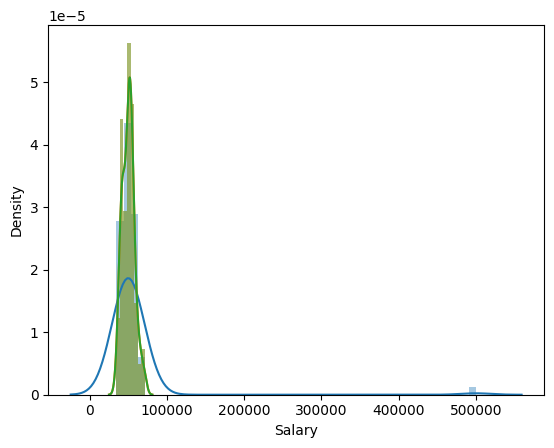

In [ ]:
#Remove Outliers with z score
sns.distplot(df["Salary"])
#min = mean - 3rd std. deviation , max = mean + 3rd std deviation
min = df["Salary"].mean() - 3*df["Salary"].std()
max = df["Salary"].mean() + 3*df["Salary"].std()
new_dataset = df[df['Salary']<=max]
new_dataset = new_dataset[new_dataset['Salary']>=min]
sns.distplot(new_dataset["Salary"])

#Outlier removal with zscore
z_score = (df["Salary"]-df["Salary"].mean())/df["Salary"].std()
new_dataset = df[(z_score <= 3) & (z_score >= -3)]
sns.distplot(new_dataset["Salary"])

/tmp/ipython-input-5-133846532.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])
/tmp/ipython-input-5-133846532.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])


<Axes: title={'center': 'Second Tech.'}, xlabel='Salary', ylabel='Density'>

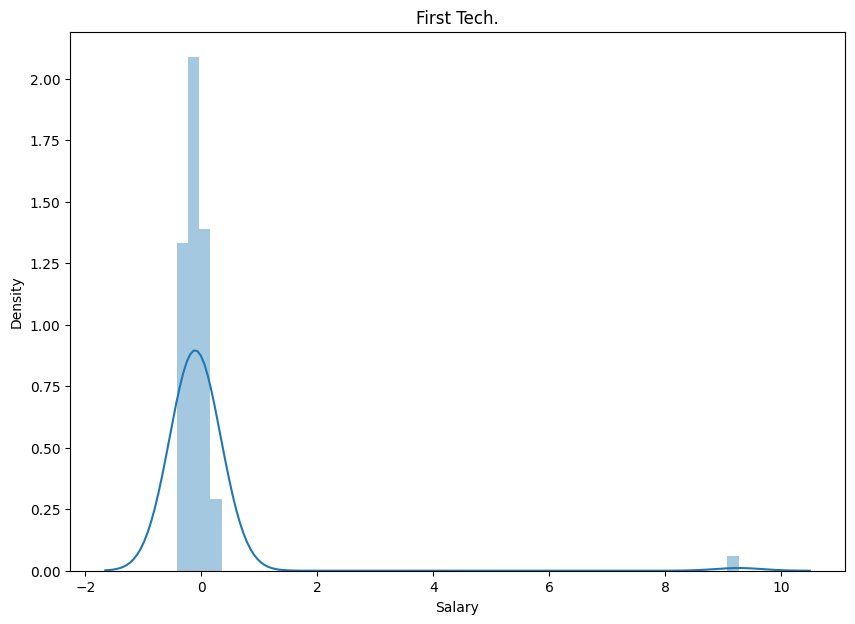

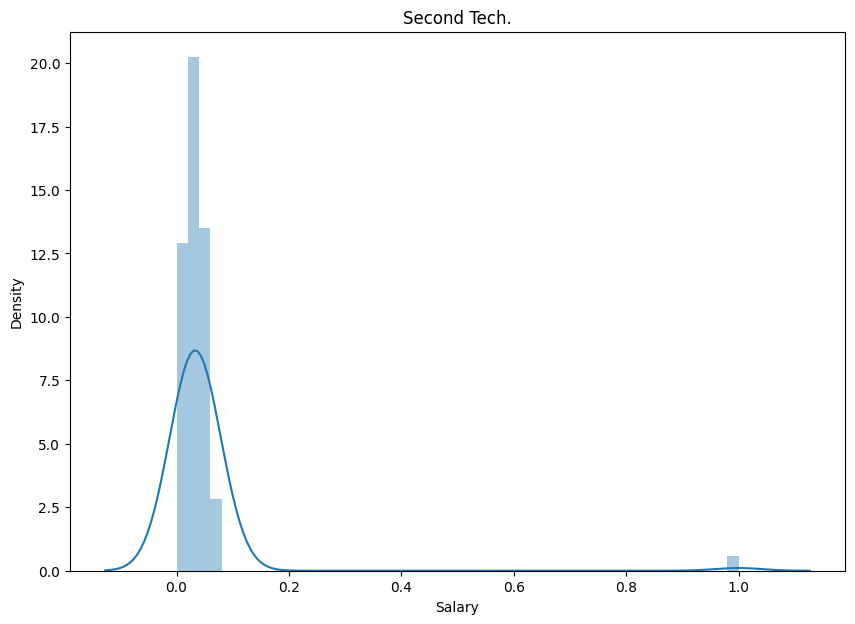

In [5]:
#feture scalling(two type)
#first type starndrdization
#x = x-mean/deviation then new x list mean be 0 and variance 1
#with this feature outlier will not be removed but its magnitude will be decreased
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df["Salary"] = ss.fit_transform(df[["Salary"]])
plt.subplots(figsize=(10,7))
plt.title("First Tech.")
sns.distplot(df["Salary"])

#second type normalization (min -max scaler)
#x = (xi - min)/(max -min)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df["Salary"] = mm.fit_transform(df[["Salary"]])
plt.subplots(figsize=(10,7))
plt.title("Second Tech.")
sns.distplot(df["Salary"])

In [7]:
#Handle Duplicate Data (remove duplicate row)
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [12]:
#replace data and change its type

df["Salary"].replace("1000","1100", inplace=True)
df["Salary"] = df["Salary"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          100 non-null    int64  
 1   Age         91 non-null     float64
 2   Salary      89 non-null     float64
 3   Department  90 non-null     object 
 4   Experience  89 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


/tmp/ipython-input-12-4123664.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Salary"].replace("1000","1100", inplace=True)


/tmp/ipython-input-14-1260953624.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])


<Axes: xlabel='Salary', ylabel='Density'>

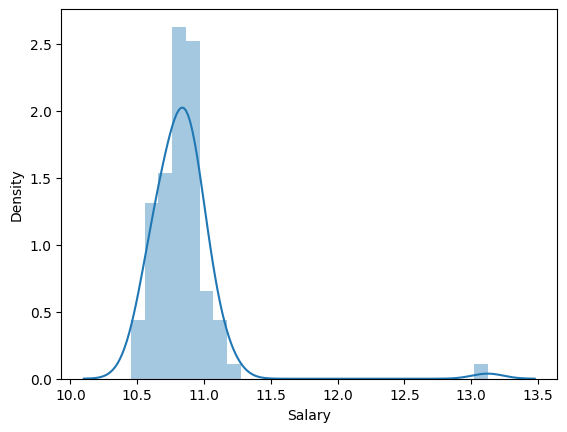

In [14]:
#Function Transformation (change pattern)
#after this tech. data transform to normal distribution from non normal distribution
#Used when there is senstive data as outlier but we cant remove it
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.log1p)
df["Salary"] = ft.fit_transform(df[["Salary"]])
sns.distplot(df["Salary"])

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector
df

,ID,Age,Salary,Department,Experience
0,1,32.5,13.122365,Tech,NaN
1,2,99.0,10.750125,Tech,6.7
2,3,33.2,10.763404,HR,40.0
3,4,37.6,NaN,Admin,4.3
4,5,28.8,10.793654,HR,4.1
...,...,...,...,...,...
95,96,NaN,10.879622,Tech,4.4
96,97,NaN,10.667329,NaN,5.8
97,98,31.3,10.844096,Tech,3.9
98,99,30.0,NaN,HR,3.4


In [23]:
#Feature selections (unnecessary coloumn removal)
#forward elimination
# f1 , f2 , f3 , f4 , f5 --> ML Model (if f3 has higher accuracy)
# (f3 , f1) , (f2,f3), (f3,f4) --> MlModel (if (f3 , f1) has high accuracy)
# (f3 , f1 ,f2) , (f3 , f1 ,f4) ---> Ml model (consider which feature pair have high accuracy)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
x = df.iloc[:,:-1]
#y = df["Coloumn_name"] Here i dont have coloumn with categorical label like true false bcoz its logistic regression
fs = SequentialFeatureSelector(lr , k_features=5 , forward=True)
fs.fit(x,y)
fs.k_feature_names_
fs.k_score_ #Show accuracy of features
#backward elimination
#opposite to forward elimination




AttributeError: k_features must be between 1 and X.shape[1].

In [26]:
#Train data and test data split
from sklearn.model_selection import train_test_split
x = df.iloc[:,:-1]
y = df["Experience"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_test
x_train


,ID,Age,Salary,Department
18,19,25.5,10.987723,HR
0,1,32.5,13.122365,Tech
74,75,16.9,NaN,Admin
66,67,29.6,10.943366,Admin
15,16,27.2,NaN,Tech
...,...,...,...,...
23,24,22.9,10.565820,Admin
34,35,34.1,NaN,Finance
40,41,NaN,10.855545,Finance
85,86,27.5,10.927969,NaN
